# Scene properties

Each **Scene** has a **background color** and **alpha**, **lights**, and a **camera**.

In [1]:
import fresnel
import math
scene = fresnel.Scene()
position = []
for i in range(6):
    position.append([2*math.cos(i*2*math.pi / 6), 2*math.sin(i*2*math.pi / 6), 0])

geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)
geometry.material = fresnel.material.Material(solid=0.0, color=fresnel.color.linear([1,0.874,0.169]))
geometry.outline_width = 0.12

## Background color and alpha

The default **background color** is black (0,0,0) and the **background alpha** is 0 (transparent).

In [2]:
scene.background_color

(0.0, 0.0, 0.0)

In [3]:
scene.background_alpha

0.0

The background color is applied to any pixel in the output image where no object is present. Change the **background alpha** to only partially transparent:

In [4]:
scene.background_alpha = 0.5

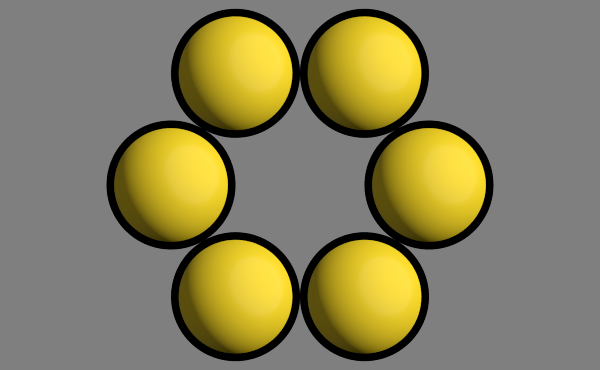

In [5]:
fresnel.preview(scene, aa_level=3)

Set a solid background color:

In [6]:
scene.background_alpha = 1.0
scene.background_color = fresnel.color.linear([0.592, 0.722, 0.98])

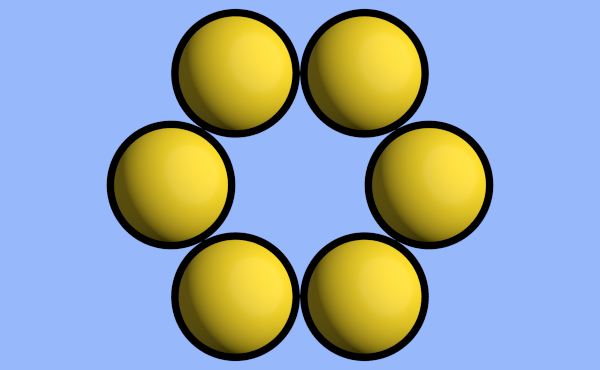

In [7]:
fresnel.preview(scene, aa_level=3)

## Light sources

Light sources light the objects in the scene. Without lights, all objects are black.

In [8]:
scene.lights.clear()

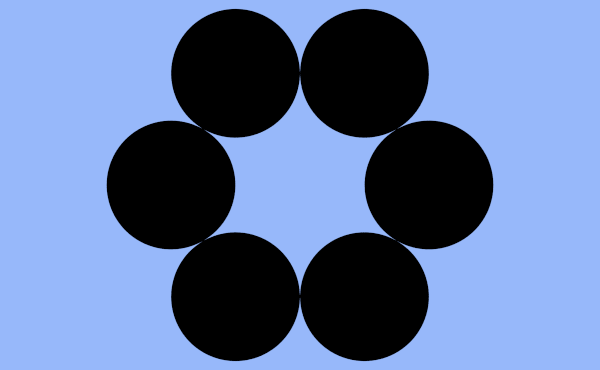

In [9]:
fresnel.preview(scene, aa_level=3)

Fresnel defines several standard lighting setups that may be easily applied.

In [10]:
scene.lights = fresnel.light.butterfly()

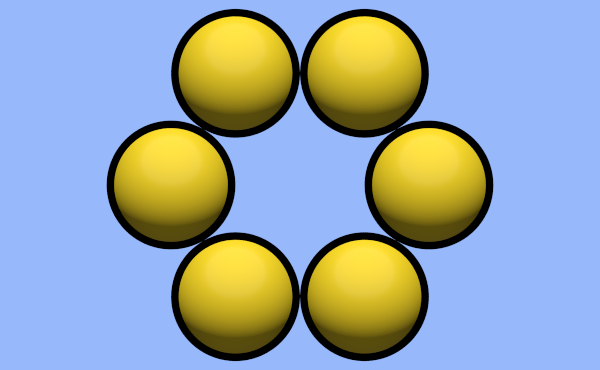

In [11]:
fresnel.preview(scene, aa_level=3)

You can modify individual lights.

In [12]:
scene.lights[0].direction = (-1, 0, 1)

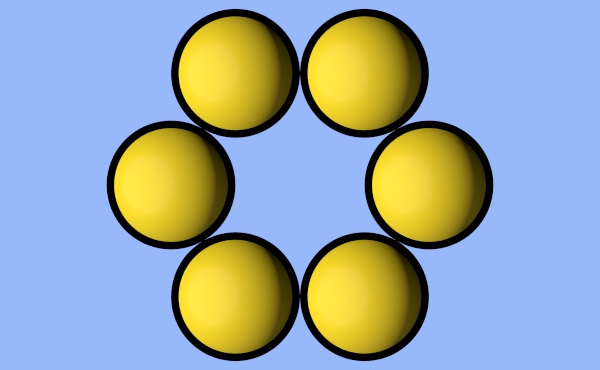

In [13]:
fresnel.preview(scene, aa_level=3)

## Camera

The camera defines the view to render into the scene. By default, the camera is `auto` and the camera is automatically selected to fit the scene every time it is rendered.

In [14]:
print(scene.camera)

auto


You can obtain the same camera explicitly with `camera.fit`. Call it **after** defining all of the geometry in your scene.

In [15]:
scene.camera = fresnel.camera.fit(scene)

A **camera** is defined by its *position*, *look-at point*, *up vector* and *height* of the view into the scene. All of these quantities are in scene coordinates.

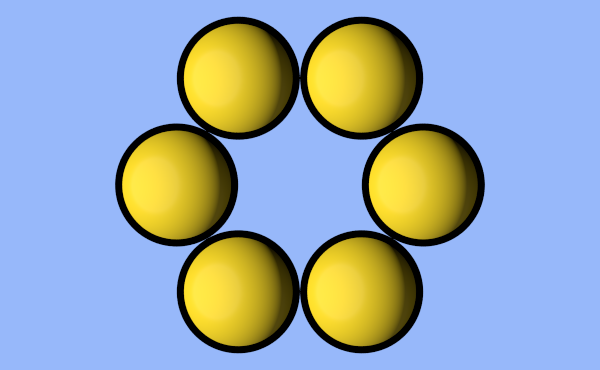

In [16]:
scene.camera = fresnel.camera.orthographic(position=(0,0,2), look_at=(0,0,0), up=(0,1,0), height=6)
fresnel.preview(scene, aa_level=3)

You can modify these parameters individually.

In [17]:
scene.camera.position = (3, 0, 10)
scene.camera.look_at=(3,0,0)

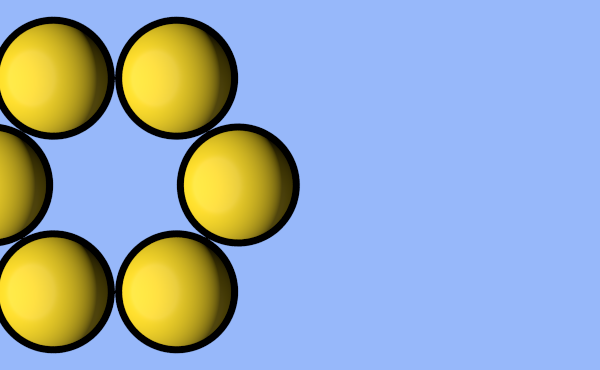

In [18]:
fresnel.preview(scene, aa_level=3)

Print the full representation of the camera.

In [19]:
print(repr(scene.camera))

fresnel.camera.orthographic(position=(3.0, 0.0, 10.0), look_at=(3.0, 0.0, 0.0), up=(0.0, 1.0, 0.0), height=6.0)


You can copy and paste this text to reproduce the same camera elsewhere.

In [20]:
scene.camera = fresnel.camera.orthographic(position=(3.0, 0.0, 10.0),
                                           look_at=(3.0, 0.0, 0.0),
                                           up=(0.0, 1.0, 0.0),
                                           height=6.0)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.